In [1]:
from PIL import Image
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [4]:
def predict(image):
    classifier_model = keras.models.load_model(r'potatoes.h5', compile = False)
    shape = (256,256,3)
    model = keras.Sequential([hub.KerasLayer(classifier_model, input_shape = shape)])     
    test_image = image.resize((256, 256))
    test_image = keras.preprocessing.image.img_to_array(test_image)
    test_image /= 255.0
    test_image = np.expand_dims(test_image, axis = 0)
    class_name = ['Potato__Early_blight','Potato__Late_blight','Potato__healthy']
    prediction = model.predict(test_image)
    confidence = round(100 * (np.max(prediction[0])), 2)
    final_pred = class_name[np.argmax(prediction)]
    return final_pred,confidence

Prediction : Potato__healthy
Confidence : 97.36%


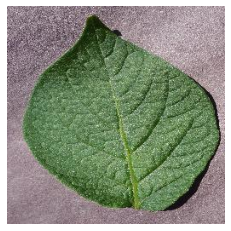

In [5]:
image = Image.open("S:/Project/training/test_images_from_internet/healty.JPG")
plt.imshow(image)
plt.axis('off')
result,confidence = predict(image)
print('Prediction : {}'.format(result))
print('Confidence : {}%'.format(confidence))